In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

# Text Processing Libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

# Sentiment Analysis
from LeIA import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khushiksi233/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/khushiksi233/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
olist_customers_dataset=pd.read_csv("olist_customers_dataset.csv") 
olist_order_items_dataset=pd.read_csv("olist_order_items_dataset.csv")
olist_order_payments_dataset=pd.read_csv("olist_order_payments_dataset.csv")
olist_order_reviews_dataset=pd.read_csv("olist_order_reviews_dataset.csv")
olist_orders_dataset=pd.read_csv("olist_orders_dataset.csv")
olist_products_dataset=pd.read_csv("olist_products_dataset.csv")
olist_sellers_dataset=pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation=pd.read_csv("product_category_name_translation.csv")
olist_geolocation_dataset=pd.read_csv("olist_geolocation_dataset.csv")

In [3]:
df = olist_orders_dataset.merge(olist_customers_dataset, on="customer_id", how="left")
df = df.merge(olist_order_reviews_dataset, on="order_id", how="left")
df = df.merge(olist_order_payments_dataset, on="order_id", how="left")
df = df.merge(olist_order_items_dataset, on="order_id", how="left")
df = df.merge(olist_products_dataset, on="product_id", how="left")
df = df.merge(olist_sellers_dataset, on="seller_id", how="left")

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [5]:
df.shape

(119143, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  review_id                     

In [7]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_item_id                       833
product_id                          833
seller_id                           833


In [8]:
# Selecting necessary columns for NLP analysis
nlp_df = df[['review_comment_title', 'review_comment_message', 'product_category_name']]

In [9]:
nlp_df

,review_comment_title,review_comment_message,product_category_name
0,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
1,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
2,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
3,Muito boa a loja,Muito bom o produto.,perfumaria
4,NaN,NaN,automotivo
...,...,...,...
119138,NaN,So uma peça que veio rachado mas tudo bem rs,bebes
119139,NaN,Foi entregue antes do prazo.,eletrodomesticos_2
119140,NaN,Foi entregue somente 1. Quero saber do outro p...,informatica_acessorios
119141,NaN,Foi entregue somente 1. Quero saber do outro p...,informatica_acessorios


In [10]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   review_comment_title    13989 non-null   object
 1   review_comment_message  50245 non-null   object
 2   product_category_name   116601 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [11]:
print("There are {} product categories in the dataset.".format(nlp_df.product_category_name.nunique()))

There are 73 product categories in the dataset.


In [12]:
nan_count_review_comment_message = nlp_df['review_comment_message'].isna().sum()
nan_count_review_comment_message

68898

In [13]:
def remove_duplicates_nlp_df(nlp_df, column_name='review_comment_message'):
    
    # Removed duplicates based on the specified column, keeping the first occurrence
    nlp_df = nlp_df.drop_duplicates(subset=[column_name], keep='first').reset_index(drop=True)
    
    # Displayed the total entries after removing duplicates
    print(f"Total entries after removing duplicates in '{column_name}': {nlp_df.shape[0]}")
    
    return nlp_df

# Removed duplicates from 'nlp_df' based on the 'review_comment_message' column
nlp_df = remove_duplicates_nlp_df(nlp_df, 'review_comment_message')

nlp_df.head()


Total entries after removing duplicates in 'review_comment_message': 36160


,review_comment_title,review_comment_message,product_category_name
0,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
1,Muito boa a loja,Muito bom o produto.,perfumaria
2,NaN,NaN,automotivo
3,NaN,O produto foi exatamente o que eu esperava e e...,pet_shop
4,NaN,fiquei triste por n ter me atendido.,NaN


In [14]:
def clean_reviews(df):
    
    # Removed rows where 'review_comment_message' is empty
    df = df.dropna(subset=['review_comment_message', 'review_comment_title', 'product_category_name']).reset_index(drop=True)

    # Removed duplicate rows
    df = df.drop_duplicates(subset=['review_comment_message'])

    return df

df_cleaned = clean_reviews(nlp_df)

df_cleaned.head()

,review_comment_title,review_comment_message,product_category_name
0,Muito boa a loja,Muito bom o produto.,perfumaria
1,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,perfumaria
2,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,papelaria
3,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,bebes
4,Enganadores,Foi entregue um produto divergente do que eu h...,climatizacao


In [15]:
df_cleaned.shape

(8603, 3)

In [16]:
# Defined Portuguese stopwords
STOP_WORDS = set(stopwords.words('portuguese'))

# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return "", []
    
    # Converted to lowercase, remove punctuation, and split into words
    cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()
    
    # Removed stopwords and created tokens
    filtered_words = [word for word in words if word not in STOP_WORDS]
    return " ".join(filtered_words), filtered_words

def preprocess_nlp_df(df):
    # Cleaned, removed stopwords, and tokenized comments
    df[['review_comment_message_clean', 'review_comment_message_tokens']] = df['review_comment_message'].apply(
        lambda text: pd.Series(clean_and_tokenize(text))
    )
    
    # Removed rows with NaN values in key columns
    df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)
    
    df.drop_duplicates(subset=['review_comment_message', 'review_comment_title'], inplace=True)
    
    return df.reset_index(drop=True)

nlp_df = preprocess_nlp_df(nlp_df)

nlp_df[['review_comment_message', 'review_comment_message_clean', 'review_comment_message_tokens']].head()

,review_comment_message,review_comment_message_clean,review_comment_message_tokens
0,Muito bom o produto.,bom produto,"[bom, produto]"
1,Obrigado pela atenção. Lojas lannister perfeit...,obrigado atenção lojas lannister perfeito tudo,"[obrigado, atenção, lojas, lannister, perfeito..."
2,Sempre vou comprar aqui pois é a melhor parabéns,sempre vou comprar aqui pois melhor parabéns,"[sempre, vou, comprar, aqui, pois, melhor, par..."
3,Até o momento não recebi o produto Protetor De...,momento recebi produto protetor colchão berço ...,"[momento, recebi, produto, protetor, colchão, ..."
4,Foi entregue um produto divergente do que eu h...,entregue produto divergente havia comprado alé...,"[entregue, produto, divergente, havia, comprad..."


In [17]:
# Initialized the Sentiment Analyzer once
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(df, column_name='review_comment_message_clean'):
    # Vectorized function to get sentiment classification
    def get_sentiment_classification(text):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    
    # Applied sentiment analysis using map for faster iteration
    df[f'{column_name}_sentiment'] = df[column_name].map(get_sentiment_classification)
    return df

# Classified sentiment in 'nlp_df' based on the 'review_comment_message_clean' column
nlp_df = classify_sentiment(nlp_df, 'review_comment_message_clean')
nlp_df[['review_comment_message_clean', 'review_comment_message_clean_sentiment']].head(25)

,review_comment_message_clean,review_comment_message_clean_sentiment
0,bom produto,Positive
1,obrigado atenção lojas lannister perfeito tudo,Positive
2,sempre vou comprar aqui pois melhor parabéns,Positive
3,momento recebi produto protetor colchão berço ...,Negative
4,entregue produto divergente havia comprado alé...,Neutral
5,produto veio bem lacrado todo original,Positive
6,prazo entrega excelente produto cuidadosamente...,Positive
7,recebi apenas 1 unidade solicitada deveriam 2 ...,Negative
8,entrega antes data marcada excelente,Positive
9,somente mala pequena bordo avião 360º viagem s...,Neutral


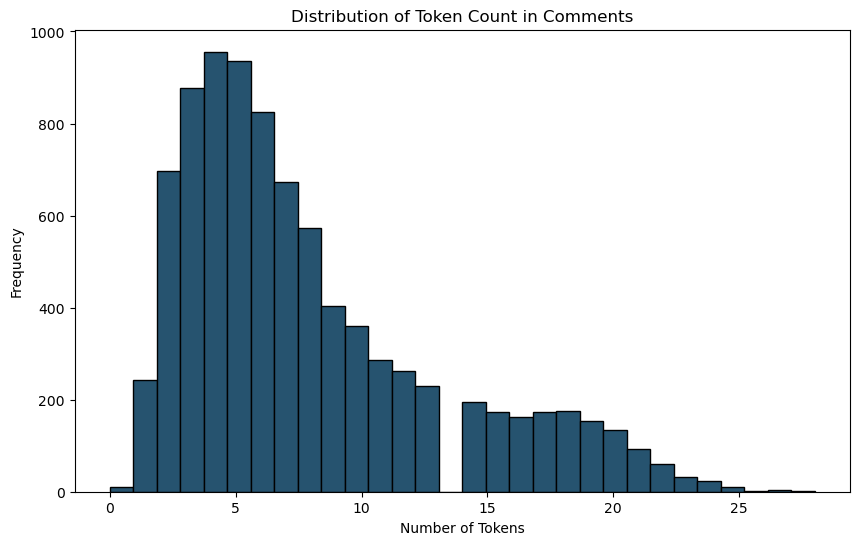

In [18]:
def plot_token_count_distribution(df, token_column='review_comment_message_tokens'):
    # Calculated the number of tokens for each entry
    df['token_count'] = df[token_column].apply(len)
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['token_count'], bins=30, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token Count in Comments')
    plt.show()
    
plot_token_count_distribution(nlp_df, 'review_comment_message_tokens')

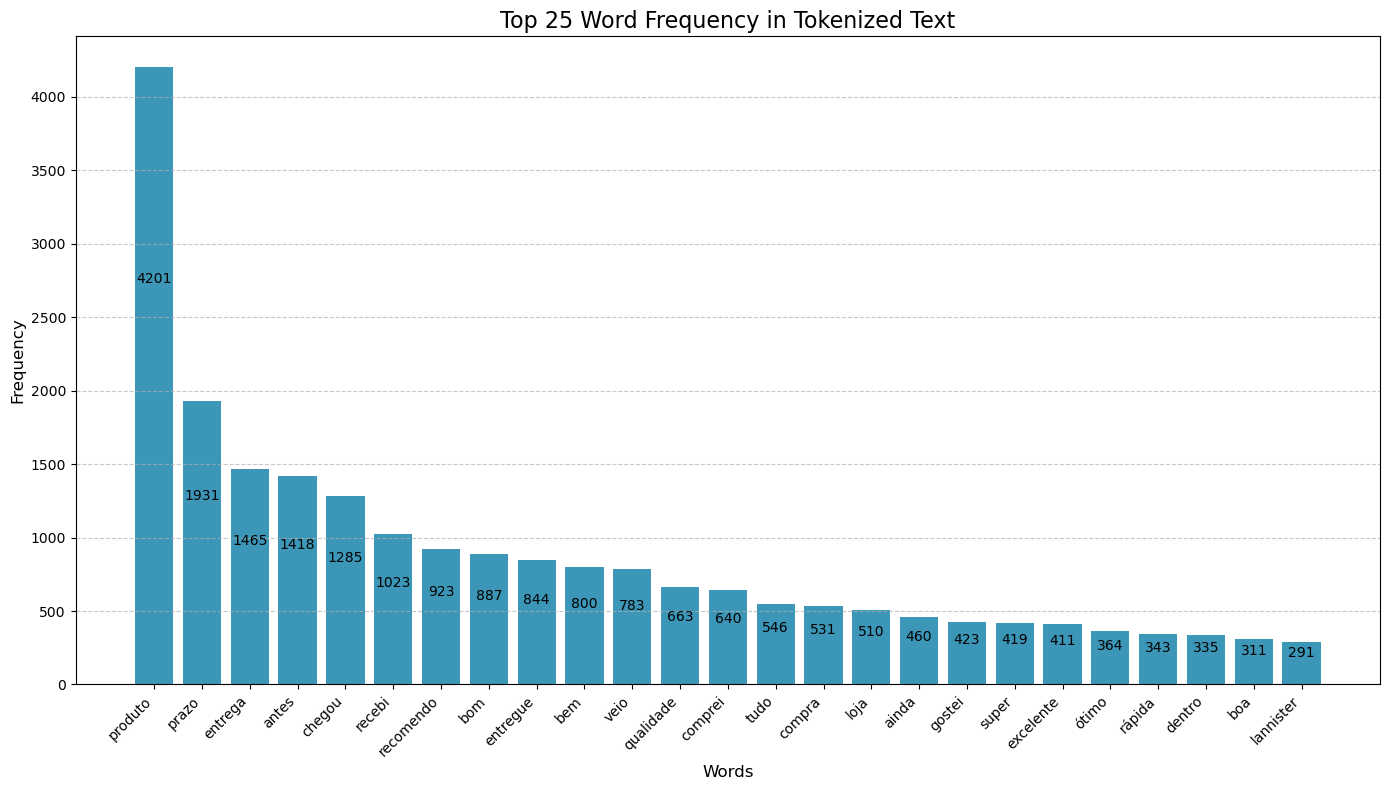

In [19]:
# Function to get top N tokens or n-grams
def get_top_tokens(df, token_column='review_comment_message_tokens', top_n=50):
    all_tokens = [token for tokens in df[token_column] for token in tokens]
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

# Function to create a DataFrame from frequency counts
def create_frequency_df(counter, columns=['Word', 'Frequency']):
    return pd.DataFrame(counter.items(), columns=columns)

# General plotting function for bar charts
def plot_top_frequencies(df, title, xlabel, column_name):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df[column_name], df['Frequency'], color=colors[1])
    
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.35), 
                 f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

top_50_tokens = get_top_tokens(nlp_df, 'review_comment_message_tokens', 50)
top_50_tokens_df = create_frequency_df(dict(top_50_tokens))
plot_top_frequencies(top_50_tokens_df.head(25), 'Top 25 Word Frequency in Tokenized Text', 'Words', 'Word')

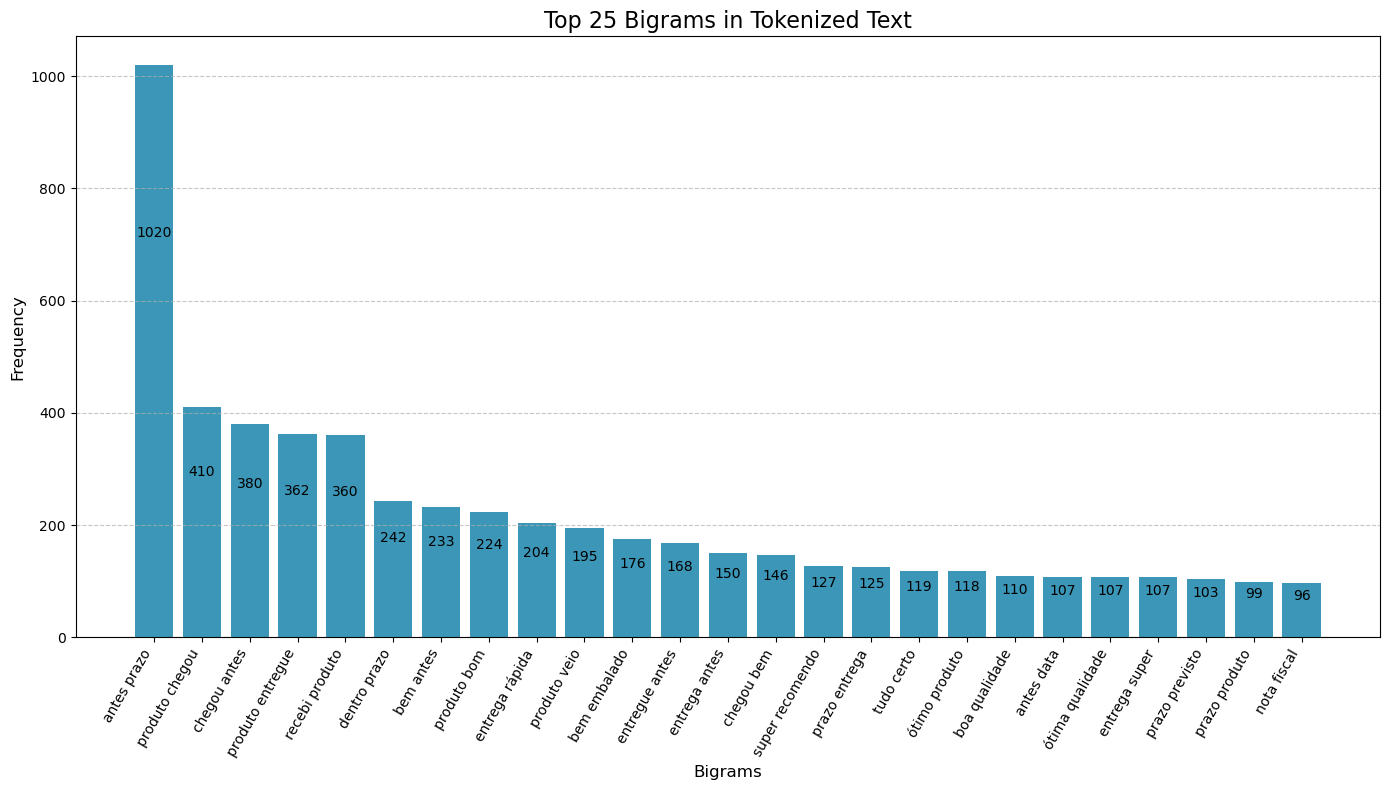

In [20]:
# N-gram generator and frequency counter
def get_top_ngrams(tokens_list, n=2, top_n=25):
    ngram_counts = Counter(
        ngram for tokens in tokens_list if tokens for ngram in ngrams(tokens, n)
    )
    # Create DataFrame directly from the most common n-grams
    return pd.DataFrame(ngram_counts.most_common(top_n), columns=['Bigram', 'Frequency'])

# Generate top 25 bigrams and plot
top_bigrams_df = get_top_ngrams(nlp_df['review_comment_message_tokens'], n=2, top_n=25)

plt.figure(figsize=(14, 8))
bars = plt.bar(
    [f'{gram[0]} {gram[1]}' for gram in top_bigrams_df['Bigram']], 
    top_bigrams_df['Frequency'], color=colors[1])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.3), 
             f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 25 Bigrams in Tokenized Text', fontsize=16)
plt.xticks(rotation=60, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


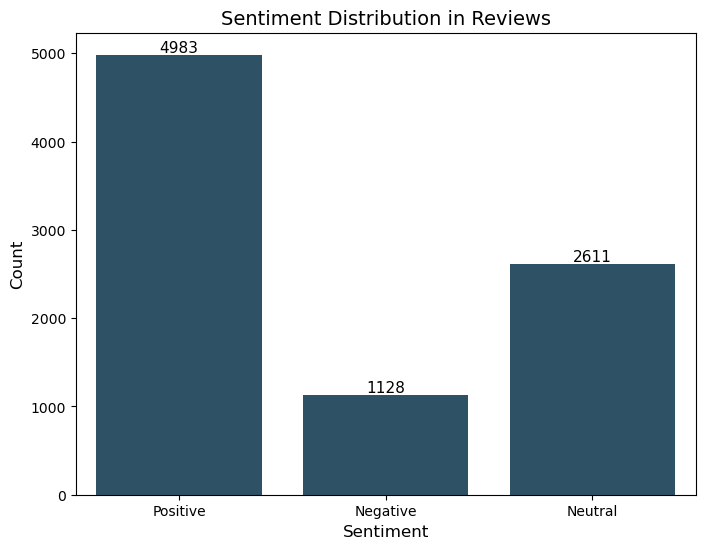

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="review_comment_message_clean_sentiment", data=nlp_df)

plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution in Reviews", fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

In [22]:
X = nlp_df['review_comment_message'] # Text column
y = nlp_df['review_comment_message_clean_sentiment'] # Target column

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)
print(y_train_encoded)
label_encoder


[0 1 2 ... 2 0 1]


LabelEncoder()

In [25]:
vectorizer = TfidfVectorizer(max_features=5000)
# Transformed texts into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Converted to dense arrays (if necessary for some models)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()
vectorizer

TfidfVectorizer(max_features=5000)

In [26]:
%%time 

# Initialized models
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=45),
    "XGBClassifier": XGBClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, 
                                     learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, 
                                     verbosity=-1, verbose=50),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel='linear', random_state=42, probability=True),
    "CatBoostClassifier": CatBoostClassifier(verbose=0, random_state=42)
}

# Trained models and calculate accuracy scores
results = []
for name, model in models.items():
    model.fit(X_train_dense, y_train_encoded)
    train_accuracy = accuracy_score(y_train_encoded, model.predict(X_train_dense))
    test_accuracy = accuracy_score(y_test_encoded, model.predict(X_test_dense))
    results.append({"Model": name, "Training Accuracy": train_accuracy, "Testing Accuracy": test_accuracy})
    
pd.DataFrame(results)

/home/khushiksi233/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/khushiksi233/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CPU times: user 27min 36s, sys: 10.1 s, total: 27min 46s
Wall time: 21min 50s


,Model,Training Accuracy,Testing Accuracy
0,GaussianNB,0.550380,0.338682
1,DecisionTreeClassifier,0.999283,0.845845
2,RandomForestClassifier,0.999283,0.852722
3,LogisticRegression,0.937509,0.886533
4,AdaBoostClassifier,0.617601,0.626934
5,XGBClassifier,0.946252,0.899713
6,LGBMClassifier,0.919020,0.885387
7,KNeighborsClassifier,0.564139,0.503152
8,GradientBoostingClassifier,0.879031,0.862464
9,SVC,0.960155,0.903152


In [27]:
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    print(f"Classification Report for {name}")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Classification Report for GaussianNB
              precision    recall  f1-score   support

    Negative       0.17      0.67      0.28       230
     Neutral       0.31      0.29      0.30       491
    Positive       0.73      0.29      0.41      1024

    accuracy                           0.34      1745
   macro avg       0.40      0.41      0.33      1745
weighted avg       0.54      0.34      0.36      1745

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

    Negative       0.68      0.60      0.64       230
     Neutral       0.78      0.87      0.82       491
    Positive       0.92      0.89      0.90      1024

    accuracy                           0.85      1745
   macro avg       0.79      0.79      0.79      1745
weighted avg       0.85      0.85      0.85      1745

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

    Negative       0.92      0.47      0.62     

/home/khushiksi233/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

    Negative       0.79      0.07      0.12       230
     Neutral       0.35      0.93      0.51       491
    Positive       0.92      0.40      0.56      1024

    accuracy                           0.50      1745
   macro avg       0.69      0.46      0.40      1745
weighted avg       0.75      0.50      0.49      1745

Classification Report for GradientBoostingClassifier
              precision    recall  f1-score   support

    Negative       0.92      0.58      0.71       230
     Neutral       0.74      0.91      0.82       491
    Positive       0.93      0.90      0.91      1024

    accuracy                           0.86      1745
   macro avg       0.86      0.80      0.81      1745
weighted avg       0.87      0.86      0.86      1745

Classification Report for SVC
              precision    recall  f1-score   support

    Negative       0.84      0.73      0.78       230

In [28]:
# Collected performance metrics
performance_data = []
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test_encoded, y_pred, average='weighted')
    }
    performance_data.append(metrics)

# Converted list of dictionaries to DataFrame
performance_df = pd.DataFrame(performance_data)

highlighted_df = (
    performance_df.style
    .highlight_max(
        subset=performance_df.select_dtypes(include='number').columns,  # Only numeric columns
        color="lightblue", 
        axis=0
    )
)


highlighted_df

/home/khushiksi233/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
0,GaussianNB,0.338682,0.537958,0.338682,0.363443
1,DecisionTreeClassifier,0.845845,0.847047,0.845845,0.845289
2,RandomForestClassifier,0.852722,0.858126,0.852722,0.844919
3,LogisticRegression,0.886533,0.887957,0.886533,0.884159
4,AdaBoostClassifier,0.626934,0.648855,0.626934,0.559243
5,XGBClassifier,0.899713,0.906463,0.899713,0.899361
6,LGBMClassifier,0.885387,0.891308,0.885387,0.884421
7,KNeighborsClassifier,0.503152,0.745484,0.503152,0.486426
8,GradientBoostingClassifier,0.862464,0.873675,0.862464,0.860690
9,SVC,0.903152,0.904255,0.903152,0.902616


In [29]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
X = nlp_df['review_comment_message'] # Text column
y = nlp_df['review_comment_message_clean_sentiment'] # Target column
# Encoding target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)

# Converted text into numerical TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_dense = X_train_tfidf.toarray()  # Ensure dense format
X_test_dense = X_test_tfidf.toarray()

# Trained the model
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train_dense, y_train_encoded)

# Saved the trained model, vectorizer, and label encoder in pickle file
with open("catboost_text_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("text_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

with open("label_encoder.pkl", "wb") as enc_file:
    pickle.dump(label_encoder, enc_file)

print("Model, vectorizer, and label encoder saved successfully!")


Model, vectorizer, and label encoder saved successfully!
